# PUMP IT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from collections import defaultdict
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

np.random.seed(69572)
# plt.figure(figsize=(120,10))

In [2]:
RAW_X = pd.read_csv('data/traning_set_values.csv', index_col='id')
y = pd.read_csv('data/training_set_labels.csv', index_col='id')
RAW_TEST_X = pd.read_csv('data/test_set_values.csv', index_col='id')

In [3]:
# Below transformation are required for label ecoding

# bool columns
tmp = ['public_meeting', 'permit']
RAW_X[tmp] = RAW_X[tmp].fillna(False)
RAW_TEST_X[tmp] = RAW_TEST_X[tmp].fillna(False)

In [4]:

na_cols = 'funder installer subvillage scheme_management scheme_name'.split()
RAW_X[na_cols] = RAW_X[na_cols].fillna('Other')
RAW_TEST_X[na_cols] = RAW_TEST_X[na_cols].fillna('Other')

COMPLETE_RAW_DATA = pd.concat([RAW_X.copy(), RAW_TEST_X.copy()])


In [5]:
print(RAW_X.shape)
print(RAW_TEST_X.shape)
print(COMPLETE_RAW_DATA.shape)

(59400, 39)
(14850, 39)
(74250, 39)


In [6]:
# http://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
d = defaultdict(preprocessing.LabelEncoder)

COMPLETE_RAW_DATA.apply(lambda x: d[x.name].fit(x))

amount_tsh               LabelEncoder()
date_recorded            LabelEncoder()
funder                   LabelEncoder()
gps_height               LabelEncoder()
installer                LabelEncoder()
longitude                LabelEncoder()
latitude                 LabelEncoder()
wpt_name                 LabelEncoder()
num_private              LabelEncoder()
basin                    LabelEncoder()
subvillage               LabelEncoder()
region                   LabelEncoder()
region_code              LabelEncoder()
district_code            LabelEncoder()
lga                      LabelEncoder()
ward                     LabelEncoder()
population               LabelEncoder()
public_meeting           LabelEncoder()
recorded_by              LabelEncoder()
scheme_management        LabelEncoder()
scheme_name              LabelEncoder()
permit                   LabelEncoder()
construction_year        LabelEncoder()
extraction_type          LabelEncoder()
extraction_type_group    LabelEncoder()


In [7]:
# DE-Encoding the variable
X = RAW_X.apply(lambda x: d[x.name].transform(x))

# DE-Encoding the variable
RAW_TEST_X = RAW_TEST_X.apply(lambda x: d[x.name].transform(x))

#
le = preprocessing.LabelEncoder().fit(y)
y = le.transform(y)

/Users/sampathm/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sampathm/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Users/sampathm/miniconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Benchmark

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [10]:
clf = clf.fit(X_train, y_train)

In [11]:
pred = clf.predict_proba(X_test)

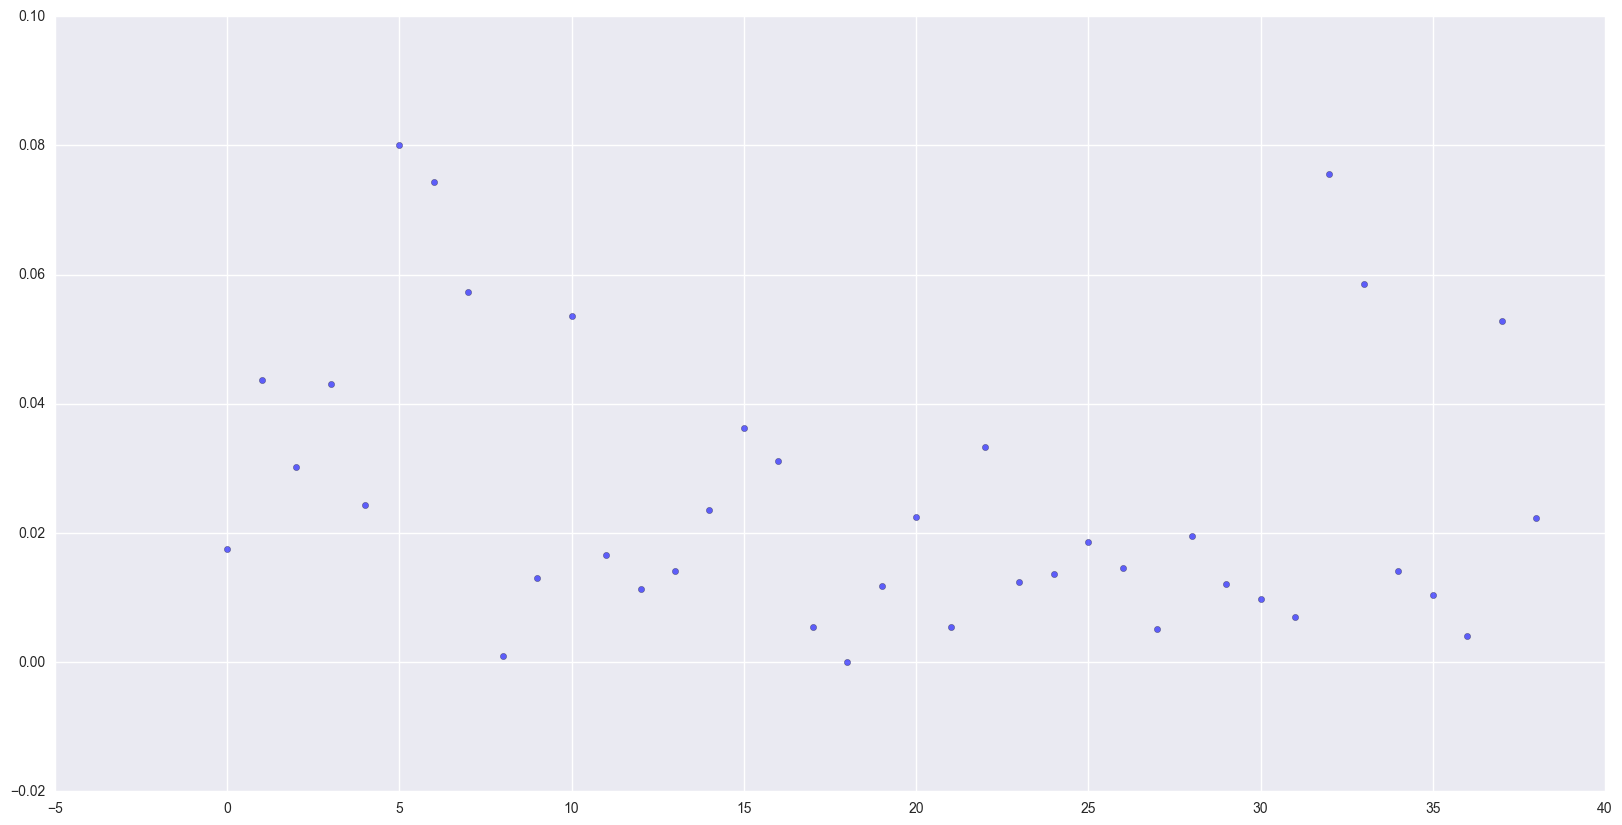

In [12]:
plt.figure(figsize=(20,10))

ax = plt.scatter(range(len(clf.feature_importances_)), clf.feature_importances_, alpha=0.6)

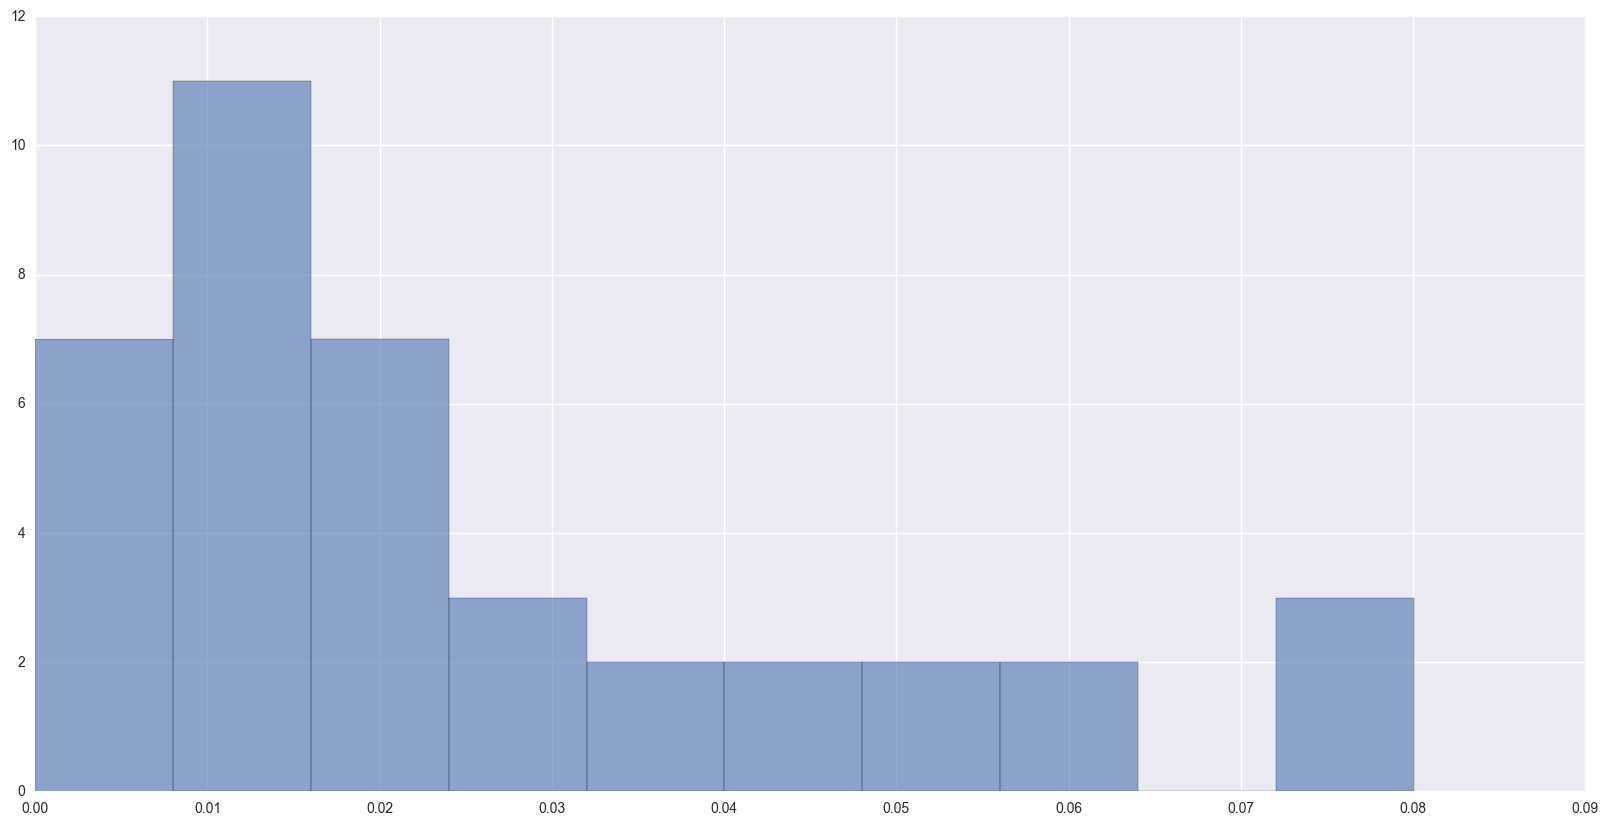

In [13]:
plt.figure(figsize=(20,10))

ax = plt.hist(clf.feature_importances_, alpha=0.6)

In [14]:
# len(pred)

clf.score(X_test, y_test) # 0.79303132333435367 # 0.79206203448627688

0.79206203448627688

In [16]:
test_ids = RAW_TEST_X.index

In [18]:
# predictions = clf.predict_proba(test_submission)
predictions = clf.predict(RAW_TEST_X)
print (predictions.shape)
predictions_labels = le.inverse_transform(predictions)
# sub = pd.DataFrame(predictions, columns=list(le.classes_))
sub = pd.DataFrame(predictions_labels, columns=['status_group'])
sub.head()

(14850,)


,status_group
0,functional
1,functional
2,functional
3,non functional
4,functional


In [19]:
sub.insert(0, 'id', test_ids)
sub.reset_index()
sub.to_csv('submit.csv', index = False)
sub.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
